In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



In [ ]:

# Load the data
data = pd.read_csv("/content/sample_data/imports-85.csv")
data = data.iloc[:, :-6]
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,Bore,Stroke,compression-ratio,horsepower,peak-rpm,city_mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

import pandas as pd

# Define your column groups
factor_cols = ['make', 'symboling', 'fuel-type', 'aspiration', 'num-of-doors',
               'body-style', 'drive-wheels', 'engine-location',
               'engine-type', 'num-of-cylinders', 'fuel-system']
int_cols = ['horsepower', 'peak-rpm', 'city_mpg', 'highway-mpg',
            'price', 'curb-weight', 'engine-size']
num_cols = ['Bore', 'Stroke', 'compression-ratio', 'wheel-base',
            'length', 'width', 'height']

# Load data if it's not already loaded
# data = pd.read_csv('your_data.csv')

# Convert factor columns to categorical
for col in factor_cols:
    data[col] = data[col].astype('category')

# Convert integer columns
for col in int_cols:
    # Check if conversion is possible; otherwise, raise a warning
    if pd.to_numeric(data[col], errors='coerce').isna().any():
        print(f"Conversion issue detected in column: {col}")
    else:
        data[col] = pd.to_numeric(data[col], errors='coerce').astype('int')

# Convert numeric columns
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Display the first few rows and the number of rows to verify
print(data.head())
print(f"Number of rows: {len(data)}")


Conversion issue detected in column: horsepower
Conversion issue detected in column: peak-rpm
Conversion issue detected in column: price
  symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0         3                 ?  alfa-romero       gas        std          two   
1         3                 ?  alfa-romero       gas        std          two   
2         1                 ?  alfa-romero       gas        std          two   
3         2               164         audi       gas        std         four   
4         2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109 

In [ ]:
data = data.drop(columns=['make'])
data = data.drop(columns=['normalized-losses'])

# Remove rows with any NaN values
data = data.dropna()
import numpy as np

# Replace '?' with NaN across the DataFrame
data = data.replace('?', np.nan)

data.dropna(inplace=True)

data.head()


,symboling,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,Bore,Stroke,compression-ratio,horsepower,peak-rpm,city_mpg,highway-mpg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
print(data.dtypes)

symboling            category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
Bore                  float64
Stroke                float64
compression-ratio     float64
horsepower             object
peak-rpm               object
city_mpg                int64
highway-mpg             int64
price                  object
dtype: object


In [ ]:
# Select variables as per your R setup
selected_columns = ['symboling', 'wheel-base', 'height',
                    'curb-weight', 'length', 'price', 'width', 'Bore',
                    'horsepower', 'compression-ratio']

new_data = data[selected_columns]
# Remove rows with any NaN values
new_data = new_data.dropna()
import numpy as np

# Replace '?' with NaN across the DataFrame
new_data = new_data.replace('?', np.nan)

new_data.head()

,symboling,wheel-base,height,curb-weight,length,price,width,Bore,horsepower,compression-ratio
0,3,88.6,48.8,2548,168.8,13495,64.1,3.47,111,9.0
1,3,88.6,48.8,2548,168.8,16500,64.1,3.47,111,9.0
2,1,94.5,52.4,2823,171.2,16500,65.5,2.68,154,9.0
3,2,99.8,54.3,2337,176.6,13950,66.2,3.19,102,10.0
4,2,99.4,54.3,2824,176.6,17450,66.4,3.19,115,8.0


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming the target and features need appropriate preprocessing
X = new_data.drop('symboling', axis=1)  # Adjust according to your specific features
y = new_data['symboling']

# One-hot encoding for the target, if necessary
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
import pandas as pd

# Assuming X_train_imputed is the output from the imputer and is a NumPy array
# Convert to a pandas DataFrame for better visualization
X_train_imputed_df = pd.DataFrame(X_train_imputed)  # Replace with your actual column names

# Now you can display the first few rows of the dataframe
print(X_train_imputed_df.head())

# Now X_train should not contain any NaN values


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


          0         1         2         3         4         5         6  \
0 -0.737059  0.236337 -1.289169 -0.740899 -1.004664 -1.021708 -0.687155   
1 -0.069644 -0.100662 -0.377806  0.221470 -0.406022  0.205759  0.159985   
2 -0.131729 -0.816786  0.226707  0.098287 -0.293953 -0.203397  0.971826   
3 -0.737059  0.236337 -1.235884 -0.740899 -0.869570 -1.021708 -0.687155   
4 -0.550804 -0.395536 -0.912497 -0.663909 -0.741642 -0.748938 -0.545965   

          7         8  
0 -0.932474 -0.198234  
1 -0.554311 -0.395014  
2  0.252436 -0.222831  
3 -0.932474 -0.198234  
4 -0.907263 -0.296624  


In [ ]:
# Define the MLPClassifier again with the same configuration
# Example: Adding more layers and increasing neurons
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 50,50,50,50), activation='relu', solver='adam', max_iter=300, random_state=123)

# Train the MLPClassifier with the imputed data
mlp.fit(X_train_imputed, y_train)

# Check the model's configuration
print("Layers and neurons per layer:", mlp.hidden_layer_sizes)
print("Activation function for the hidden layers:", mlp.activation)



Layers and neurons per layer: (100, 50, 50, 50, 50, 50)
Activation function for the hidden layers: relu


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

# Predict classes
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))  # argmax to convert one-hot to class labels
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.64


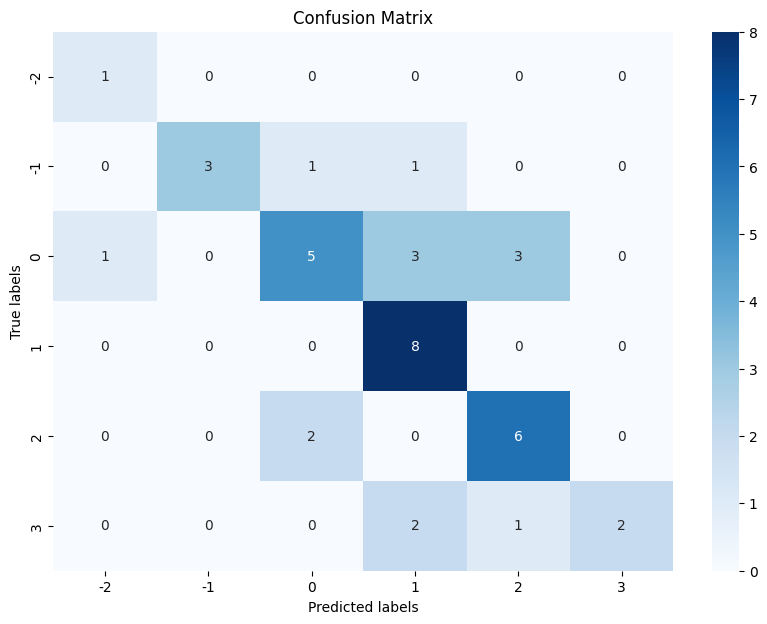

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
data['symboling'] = data['symboling'].astype('category').cat.codes


In [ ]:
# Convert categorical columns to integer codes
categorical_cols = ['fuel-type', 'body-style','engine-location' ,'aspiration', 'drive-wheels', 'price','num-of-doors','engine-type','num-of-cylinders', 'fuel-system']  # Add all your factor columns here

for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

print(data.dtypes)

symboling               int8
fuel-type               int8
aspiration              int8
num-of-doors            int8
body-style              int8
drive-wheels            int8
engine-location         int8
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type             int8
num-of-cylinders        int8
engine-size            int64
fuel-system             int8
Bore                 float64
Stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city_mpg               int64
highway-mpg            int64
price                  int16
dtype: object


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Example: Dummy DataFrame to illustrate
# data = pd.read_csv('path_to_your_data.csv')
# Assuming 'data' is already preprocessed and contains all columns except 'symboling'
X = data.drop('symboling', axis=1)
y = data['symboling']

# Save feature names before any transformation that might convert DataFrame to NumPy array
feature_names = X.columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Lasso Logistic Regression Model
model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, C=0.4)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Print coefficients and identify non-zero coefficients (variable selection)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Identify selected features
selected_features = []
for i, class_coefs in enumerate(model.coef_):
    # Filter out non-zero coefficients and match them to feature names
    features = [feature_names[j] for j, coef in enumerate(class_coefs) if coef != 0]
    selected_features.append((i, features))

# Print selected features for each class
for class_index, features in selected_features:
    print(f"Class {class_index} selected features: {features}")

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.82      0.69      0.75        13
           3       0.64      0.75      0.69        12
           4       1.00      0.11      0.20         9
           5       0.31      1.00      0.47         4

    accuracy                           0.59        39
   macro avg       0.55      0.51      0.42        39
weighted avg       0.73      0.59      0.56        39

Intercept: [-1.55826504 -0.06773419  1.17385498  0.90428405  0.55035927 -1.00249906]
Coefficients: [[ 0.          0.          0.          0.          0.00302353  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.29745302  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.54995712  0.          0.          0.
   0.32245921  0.          0.          0.          0.          0.
   0.          0.  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Aggregating unique features across all classes
final_selected_features = set()

final_selected_features.update([
    'drive-wheels', 'Bore',
    'num-of-doors', 'wheel-base', 'Stroke', 'compression-ratio', 'peak-rpm', 'price',
    'aspiration', 'width', 'curb-weight', 'num-of-cylinders', 'engine-size', 'fuel-system',
    'body-style', 'height', 'highway-mpg', 'engine-location', 'city_mpg'
])

final_selected_features = [
    'drive-wheels', 'Bore', 'num-of-doors', 'wheel-base', 'Stroke', 'compression-ratio', 'peak-rpm', 'price',
    'aspiration', 'width', 'curb-weight', 'num-of-cylinders', 'engine-size', 'fuel-system',
    'body-style', 'height', 'highway-mpg', 'engine-location', 'city_mpg'
]
# Create a new DataFrame with only the selected features
new_data_lasso = data[final_selected_features]

# Check the first few rows of the new DataFrame to confirm it's correctly created
# print(new_data_lasso.head())

# Optionally, you can also include the target variable 'symboling' if you plan to use this DataFrame for further modeling
new_data_lasso_target = data[final_selected_features + ['symboling']]  # Add 'symboling' back if needed for modeling

# print(new_data_lasso_target.head())
new_data_lasso_target = new_data_lasso_target.dropna()
import numpy as np

# Replace '?' with NaN across the DataFrame
new_data_lasso_target = new_data_lasso_target.replace('?', np.nan)

new_data_lasso_target.head()




,drive-wheels,Bore,num-of-doors,wheel-base,Stroke,compression-ratio,peak-rpm,price,aspiration,width,curb-weight,num-of-cylinders,engine-size,fuel-system,body-style,height,highway-mpg,engine-location,city_mpg,symboling
0,2,3.47,1,88.6,2.68,9.0,5000,28,0,64.1,2548,2,130,5,0,48.8,27,0,21,5
1,2,3.47,1,88.6,2.68,9.0,5000,45,0,64.1,2548,2,130,5,0,48.8,27,0,21,5
2,2,2.68,1,94.5,3.47,9.0,5000,45,0,65.5,2823,3,152,5,2,52.4,26,0,19,3
3,1,3.19,0,99.8,3.40,10.0,5500,32,0,66.2,2337,2,109,5,3,54.3,30,0,24,4
4,0,3.19,0,99.4,3.40,8.0,5500,56,0,66.4,2824,1,136,5,3,54.3,22,0,18,4


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming the target and features need appropriate preprocessing
X = new_data_lasso_target.drop('symboling', axis=1)  # Adjust according to your specific features
y = new_data_lasso_target['symboling']

# One-hot encoding for the target, if necessary
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=123)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
import pandas as pd

# Assuming X_train_imputed is the output from the imputer and is a NumPy array
# Convert to a pandas DataFrame for better visualization
X_train_imputed_df = pd.DataFrame(X_train_imputed)  # Replace with your actual column names

# Now you can display the first few rows of the dataframe
print(X_train_imputed_df.head())


         0         1         2         3         4         5         6   \
0 -0.667993 -0.687155  1.139521 -0.737059  0.167148 -0.198234  0.205572   
1 -0.667993  0.159985  1.139521 -0.069644  0.464042 -0.395014 -0.644309   
2  1.168988  0.971826  1.139521 -0.131729  0.790625 -0.222831 -0.644309   
3 -0.667993 -0.687155  1.139521 -0.737059  0.167148 -0.198234  0.205572   
4 -0.667993 -0.545965 -0.877562 -0.550804 -0.604777 -0.296624 -0.644309   

         7         8         9         10        11        12        13  \
0  0.345577 -0.512148 -1.021708 -1.289169 -0.120386 -0.758869 -1.155664   
1 -1.630020 -0.512148  0.205759 -0.377806 -0.120386 -0.186446 -1.155664   
2 -1.467084 -0.512148 -0.203397  0.226707 -0.120386  0.363079  0.861019   
3  0.589981 -0.512148 -1.021708 -1.235884 -0.120386 -0.758869 -1.155664   
4  1.099156 -0.512148 -0.748938 -0.912497 -0.120386 -0.735972 -1.155664   

         14        15        16        17        18  
0  0.412643  0.236337  0.917068 -0.140952  0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Define the MLPClassifier again with the same configuration
# Example: Adding more layers and increasing neurons
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 50,50,50,50), activation='relu', solver='adam', max_iter=300, random_state=123)

# Train the MLPClassifier with the imputed data
mlp.fit(X_train_imputed, y_train)

# Check the model's configuration
print("Layers and neurons per layer:", mlp.hidden_layer_sizes)
print("Activation function for the hidden layers:", mlp.activation)



Layers and neurons per layer: (100, 50, 50, 50, 50, 50)
Activation function for the hidden layers: relu


In [ ]:
# Predict classes
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))  # argmax to convert one-hot to class labels
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.72


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("/content/sample_data/pc_data.csv")
print(data.head())


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'symboling' is categorical
label_encoder = LabelEncoder()
data['symboling'] = label_encoder.fit_transform(data['symboling'])

# Normalize the input features
scaler = StandardScaler()
features = ['PC1', 'PC2']  # the features used for prediction
data[features] = scaler.fit_transform(data[features])


In [ ]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['symboling']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Define the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50,50), max_iter=300, activation='relu',
                    solver='adam', random_state=1)

# Train the model
mlp.fit(X_train, y_train)


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.717948717948718
